In [7]:

from keras.models import load_model
import pickle
import os
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path

In [8]:
split_data_path = r'C:\Users\Administrator\Documents\Learning\FaultFindy\Faultfindy-Faulty_tyre_Classification\artifacts\data_Preprocessing\split_list.npy'
flat_split_data_path = r'C:\Users\Administrator\Documents\Learning\FaultFindy\Faultfindy-Faulty_tyre_Classification\artifacts\data_Preprocessing\flat_split_list.npy'
split_list = np.load(Path(split_data_path), allow_pickle=True)
flat_split_list = np.load(Path(flat_split_data_path), allow_pickle=True)
flat_train_images, flat_test_images, flat_train_labels, flat_test_labels = flat_split_list
train_images, test_images, train_labels, test_labels, val_images, val_labels = split_list


In [37]:
defective_images = r'C:\Users\Administrator\Documents\Learning\FaultFindy\Faultfindy-Faulty_tyre_Classification\artifacts\data_ingestion\Digital images of defective and good condition tyres\defective'
good_images = r'C:\Users\Administrator\Documents\Learning\FaultFindy\Faultfindy-Faulty_tyre_Classification\artifacts\data_ingestion\Digital images of defective and good condition tyres\good'
EDA_dir = r'C:\Users\Administrator\Documents\Learning\FaultFindy\Faultfindy-Faulty_tyre_Classification\visuals/EDA'
class_names=['Defected','Good']
os.makedirs(Path(EDA_dir),exist_ok=True)

In [21]:
defective_files= os.listdir(defective_images)
defective_files=len(defective_files)
print(f"No. of Defective Tyres images:{defective_files}")
good_files= os.listdir(good_images)
good_files=len(good_files)
print(f"No. of Good Tyres images:{good_files}")

No. of Defective Tyres images:1028
No. of Good Tyres images:828


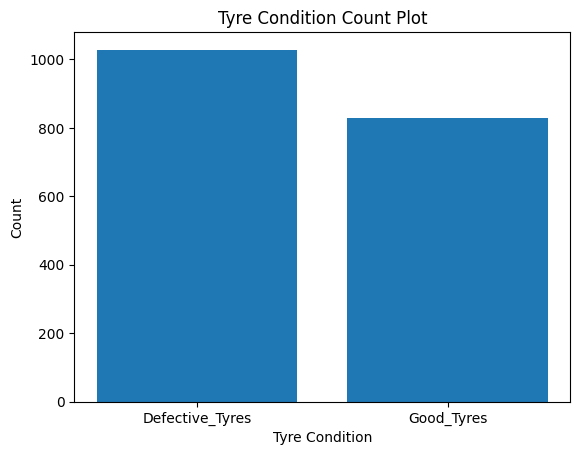

In [26]:
data = [defective_files, good_files]
keys = ["Defective_Tyres", "Good_Tyres"]

plt.bar(keys,data)
plt.xlabel("Tyre Condition")
plt.ylabel("Count")
plt.title("Tyre Condition Count Plot")
img_path = f"{EDA_dir}/Tyre_Condition_Count_Plot.png"
plt.savefig(Path(img_path))


In [28]:
n_train = train_labels.shape[0]
n_val = val_labels.shape[0]
n_test = test_labels.shape[0]

print("Number of training examples: {}".format(n_train))
print("Number of validation examples: {}".format(n_val))
print("Number of testing examples: {}".format(n_test))

print("Training images are of shape: {}".format(train_images.shape))
print("Training labels are of shape: {}".format(train_labels.shape))
print("Validation images are of shape: {}".format(val_images.shape))
print("Validation labels are of shape: {}".format(val_labels.shape))
print("Test images are of shape: {}".format(test_images.shape))
print("Test labels are of shape: {}".format(test_labels.shape))

Number of training examples: 1484
Number of validation examples: 186
Number of testing examples: 186
Training images are of shape: (1484, 224, 224, 3)
Training labels are of shape: (1484,)
Validation images are of shape: (186, 224, 224, 3)
Validation labels are of shape: (186,)
Test images are of shape: (186, 224, 224, 3)
Test labels are of shape: (186,)


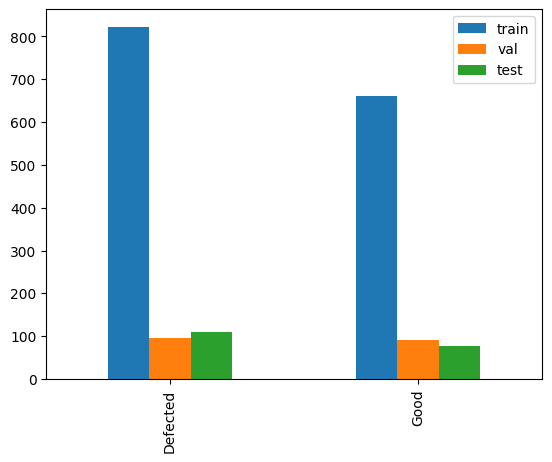

In [31]:
_, train_counts = np.unique(train_labels, return_counts = True)
_, val_counts = np.unique(val_labels, return_counts = True)
_, test_counts = np.unique(test_labels, return_counts = True)

pd.DataFrame({'train': train_counts, "val": val_counts, "test": test_counts}, index = class_names).plot.bar()

img_path = f"{EDA_dir}/data_split_count.png"
plt.savefig(Path(img_path))

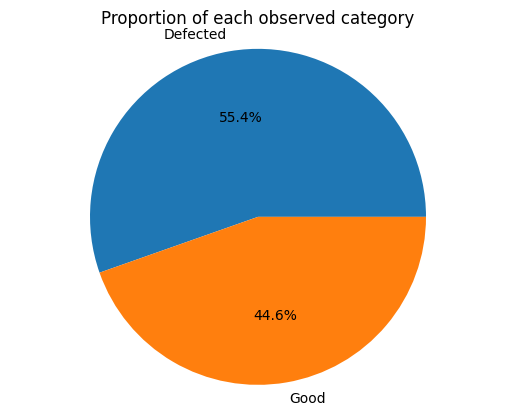

In [36]:
plt.pie(train_counts,
        explode=(0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
img_path = f"{EDA_dir}/observed_category_proportion.png"
plt.savefig(Path(img_path))

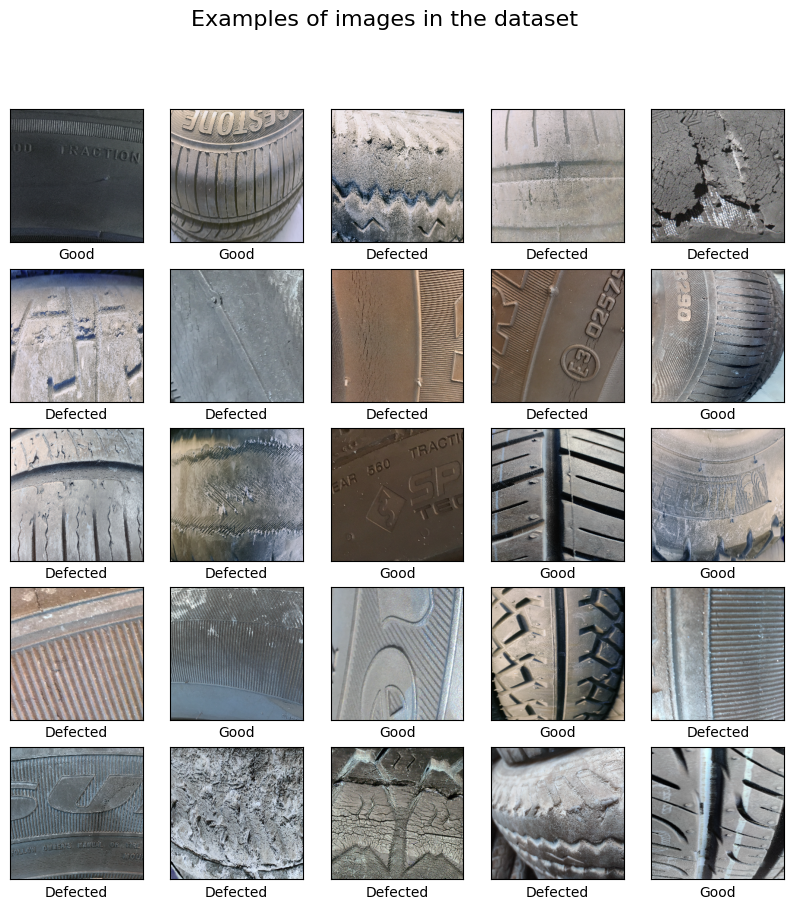

In [40]:
def display_examples(class_names, images, labels):
    fig = plt.figure(figsize = (10,10))
    fig.suptitle("Examples of images in the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
display_examples(class_names, train_images, train_labels)
img_path = f"{EDA_dir}/explore_data_Set.png"
plt.savefig(Path(img_path))

In [136]:
model_dic={}
for model in models:
    model_path = os.path.join(path,model)
    if model == 'KNN.pkl':
        model_dic[model.split('.')[0]] = pickle.load(open(model_path, 'rb'))
    elif model == 'RandomForest.pkl':
        model_dic[model.split('.')[0]] = pickle.load(open(model_path, 'rb'))      
    elif model == 'resnet_50.h5':
        model_dic[model.split('.')[0]] = load_model(model_path)    
    elif model == 'vgg16.h5':
        model_dic[model.split('.')[0]] = load_model(model_path)
print(model_dic)

{'KNN': RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54])},
                   verbose=2), 'RandomForest': RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=150),
                   n_iter=4, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 40],
                                        'max_features': [3, 50],
                                        'min_samples_split': [10, 20]},
                   random_state=42, verbose=2), 'resnet_50': <keras.engine.functional.Functional object at 0x0000020AECBF5BB0>, 'vgg16': <keras.engine.functional.Functional object at 0x0000020AEAC0E6D0>}


In [138]:
for key in model_dic.keys():
    print(key)
    print(model_dic['vgg16'])
    print('--------')

KNN
--------
RandomForest
--------
resnet_50
--------
vgg16
--------


In [71]:
print(type(KNN).__name__)

RandomizedSearchCV


In [144]:
predictions = model_dic['vgg16'].predict(test_images)
accuracy_test = accuracy_score(test_labels, np.argmax(predictions,axis=1))


6/6 [==============================] - 51s 8s/step


In [146]:
accuracy_test

0.9408602150537635

In [54]:
predictions = KNN.predict(flat_test_images)
accuracy_test = accuracy_score(flat_test_labels, predictions)
classification_report1 = classification_report(flat_test_labels,predictions, target_names=['Defective(Class 0)', 'Good(Class 1)'])
cm = confusion_matrix(flat_test_labels, predictions)

In [79]:
pat=r'C:\Users\Administrator\Documents\Learning\FaultFindy\Faultfindy-Faulty_tyre_Classification\models\KNN.pkl'
KNN = pickle.load(open(pat, 'rb'))
print(type(KNN).__name__)



RandomizedSearchCV


In [39]:
flat_test_labels.shape

(372,)

In [55]:
accuracy_test

0.6129032258064516

In [132]:
def load_models():
    
        models_path = r'C:\Users\Administrator\Documents\Learning\FaultFindy\Faultfindy-Faulty_tyre_Classification\models'
        models=os.listdir(Path(models_path))
        model_dic={}
        for model in models:
            model_path = os.path.join(models_path,model)
            if model == 'KNN.pkl':
                model_dic[model.split('.')[0]] = pickle.load(open(model_path, 'rb'))
            elif model == 'RandomForest.pkl':
                model_dic[model.split('.')[0]] = pickle.load(open(model_path, 'rb'))      
            elif model == 'resnet_50.h5':
                model_dic[model.split('.')[0]] = load_model(model_path)    
            elif model == 'vgg16.h5':
                model_dic[model.split('.')[0]] = load_model(model_path)

        return model_dic

In [133]:
x=load_models()

In [134]:
def plot_accuracy_loss_chart(history,model_name):
        epochs = [i for i in range(10)]
        fig , ax = plt.subplots(1,2)
        train_acc = history.history['accuracy']
        train_loss = history.history['loss']
        val_acc = history.history['val_accuracy']
        val_loss = history.history['val_loss']
        fig.set_size_inches(20,10)
        ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
        ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
        ax[0].set_title(f'Training & Validation Accuracy for {model_name}')
        ax[0].legend()
        ax[0].set_xlabel("Epochs")
        ax[0].set_ylabel("Accuracy")

        ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
        ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
        ax[1].set_title('Training & Validation Loss')
        ax[1].legend()
        ax[1].set_xlabel("Epochs")
        ax[1].set_ylabel("Training & Validation Loss")
        title = ax[0].get_title()
        img_path = "visuals/{model_name}{title}.png"
        plt.savefig(Path(img_path))
        plt.show()